# Effects of Covid on Agricultural sector

## Group Project
### Group member: PEI(Perry) LI, ZAHID KHAN, Kaishun(Ted) Yang Jiani Wu

In [1]:
 devtools::install_github("thomasp85/patchwork") 

lifecycle   (1.0.2 -> 1.0.3) [CRAN]
viridisLite (0.4.0 -> 0.4.1) [CRAN]
scales      (1.2.0 -> 1.2.1) [CRAN]
isoband     (0.2.5 -> 0.2.6) [CRAN]
gtable      (0.3.0 -> 0.3.1) [CRAN]


Installing 5 packages: lifecycle, viridisLite, scales, isoband, gtable




The downloaded binary packages are in
	/var/folders/qp/kpnn9_qd74v_9w9stjlfqwpw0000gn/T//RtmpDLBHKY/downloaded_packages
✔  checking for file ‘/private/var/folders/qp/kpnn9_qd74v_9w9stjlfqwpw0000gn/T/RtmpDLBHKY/remotes10d456ac3e29f/thomasp85-patchwork-c14c960/DESCRIPTION’
─  preparing ‘patchwork’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘patchwork_1.1.2.9000.tar.gz’
   


In [2]:
library(tidyverse)#load tidyverse libraries
library(tidyr) #tidy messy data
library(readxl)#read excel files
library(readr) #read rectangular text data 
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(data.table)#data.table data types and data handling
library(ggplot2)#declaratively creating graphics
library(patchwork)#for combine the graphs

library(xml2) # makes it easier to work with HTML and XML from R

── Attaching packages ───────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ──────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




 ### Read the number of excel files of livestock before and after the covid-19 outbreak respectively

In [3]:
livestock_2020 <- read_excel('../Data/agricultural-production-statistics-june-2021-final.xlsx',sheet=2) #Read the data about livestock after there is a outbreak
livestock_2018 <- read_excel('../Data/2019.xlsx',sheet=2) #Read the data about livestock before is a outbreak

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`


In [4]:
livestock_2020 #Show the livestock data table from 2020-2021
livestock_2018 #Show the livestock data table from 2018-2019
# class(livestock)


Table 1,...2,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Selected livestock numbers(1)(2)(3),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
By region,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Region,NA,At 30 June,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Total sheep,NA,NA,Total dairy cattle,NA,NA,Total beef cattle,NA,NA,Total deer,NA,NA
NA,NA,2020,2021,% change,2020,2021,% change,2020,2021,% change,2020,2021,% change
NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Northland,NA,236,240,1.8,311,311,-0.2,378,361,-4.4000000000000004,S,S,S


Table 1,...2,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Selected livestock numbers(1)(2)(3),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
By region,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Region,NA,At 30 June,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Total sheep,NA,NA,Total dairy cattle,NA,NA,Total beef cattle,NA,NA,Total deer,NA,NA
NA,NA,2018,2019,% change,2018,2019,% change,2018,2019,% change,2018,2019,% change
NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Northland,NA,280,278,-0.6,367,335,-8.9,400,382,-4.5999999999999996,4,S,S


### As the imported data tables are a lot of garbage and NA, so the next step is data wrangling

 ### 1. Rename column names for two tables

#### 1.1 Rename the columns

In [5]:
colnames(livestock_2020) <- (c("district", "f1", "2020sheep", "2021sheep", "f2", "2020cow_cattles", "2021cow_cattles", "f3","2020beef","2021beef","f4","2020deer","2021deer","f5"))#Give the columns new names for data table which records livestocks numbers after covid and the column name starting with 'f' will be deleted later
colnames(livestock_2018) <- (c("district", "f1", "2018sheep", "2019sheep", "f2", "2018cow_cattles", "2019cow_cattles", "f3","2018beef","2019beef","f4","2018deer","2019deer","f5"))#Give the columns new names for data table which records livestocks numbers before covid and the column name starting with 'f' will be deleted later

In [6]:
livestock_2020 #Show the 2020-2021 data table after given column new names
livestock_2018 #Show the 2018-2019 data table after given column new names

district,f1,2020sheep,2021sheep,f2,2020cow_cattles,2021cow_cattles,f3,2020beef,2021beef,f4,2020deer,2021deer,f5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Selected livestock numbers(1)(2)(3),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
By region,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Region,NA,At 30 June,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Total sheep,NA,NA,Total dairy cattle,NA,NA,Total beef cattle,NA,NA,Total deer,NA,NA
NA,NA,2020,2021,% change,2020,2021,% change,2020,2021,% change,2020,2021,% change
NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Northland,NA,236,240,1.8,311,311,-0.2,378,361,-4.4000000000000004,S,S,S


district,f1,2018sheep,2019sheep,f2,2018cow_cattles,2019cow_cattles,f3,2018beef,2019beef,f4,2018deer,2019deer,f5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Selected livestock numbers(1)(2)(3),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
By region,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Region,NA,At 30 June,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Total sheep,NA,NA,Total dairy cattle,NA,NA,Total beef cattle,NA,NA,Total deer,NA,NA
NA,NA,2018,2019,% change,2018,2019,% change,2018,2019,% change,2018,2019,% change
NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Northland,NA,280,278,-0.6,367,335,-8.9,400,382,-4.5999999999999996,4,S,S


 ### 2. Removing redundant rows and columns of data

 #### 2.1 Removing redundant rows

In [7]:
# livestock%<>%select(-f1)
livestock_2020_1<- livestock_2020[-c(1:8),] #Remove the first to eighth rows about 2020-2021 data table
livestock_2020_1

livestock_2018_1<- livestock_2018[-c(1:8),] #Remove the first to eighth rows about 2018-2019 data table
livestock_2018_1


district,f1,2020sheep,2021sheep,f2,2020cow_cattles,2021cow_cattles,f3,2020beef,2021beef,f4,2020deer,2021deer,f5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,NA,236,240,1.8,311,311,-0.2,378,361,-4.4000000000000004,S,S,S
Auckland,NA,180,S,S,123,85,-31.2,113,125,10,S,6,S
Waikato,NA,1407,1540,9.5,1767,1810,2.5,540,622,15.2,70,64,-8.6
Bay of Plenty,NA,221,S,S,295,313,6.3,110,S,S,37,S,S
Gisborne,NA,1365,1446,5.9,S,10,S,250,261,4.5999999999999996,S,S,S
Hawke's Bay,NA,2530,2604,2.9,S,72,S,400,418,4.4000000000000004,67,60,-10.9
Taranaki,NA,388,442,14,555,538,-2.9,122,129,5.0999999999999996,3,2,-9.5
Manawatū-Whanganui,NA,4681,4709,0.6,437,444,1.6,572,595,4,50,47,-4.8
Wellington,NA,1443,1291,-10.6,100,93,-7.7,152,154,1.2,S,S,S


district,f1,2018sheep,2019sheep,f2,2018cow_cattles,2019cow_cattles,f3,2018beef,2019beef,f4,2018deer,2019deer,f5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,NA,280,278,-0.6,367,335,-8.9,400,382,-4.5999999999999996,4,S,S
Auckland,NA,202,S,S,116,124,6.3,114,118,3.7,11,9,-21.1
Waikato,NA,1632,1524,-6.6,1814,1823,0.5,517,547,5.8,67,67,0.9
Bay of Plenty,NA,233,238,2.2000000000000002,307,318,3.6,96,107,10.9,37,S,S
Gisborne,NA,1457,1380,-5.3,S,S,S,261,254,-2.7,S,S,S
Hawke's Bay,NA,2851,2876,0.9,87,78,-10.6,429,449,4.7,56,61,8.5
Taranaki,NA,395,442,11.8,548,587,7.1,116,125,7.5,3,3,8.4
Manawatū-Whanganui,NA,5060,4791,-5.3,486,468,-3.9,554,575,3.8,56,51,-8.9
Wellington,NA,1474,1434,-2.7,79,83,4.5999999999999996,132,150,13.8,S,8,S


 #### 2.2 Removing redundant columns

In [8]:

livestock_2020_1 %<>% select(-f1,-f2,-f3,-f4,-f5)  #Use select -xxx to remove columns with column names starting with 'f'

livestock_2020_1

livestock_2018_1 %<>% select(-f1,-f2,-f3,-f4,-f5)  #Use select -xxx to remove columns with column names starting with 'f'

livestock_2018_1




district,2020sheep,2021sheep,2020cow_cattles,2021cow_cattles,2020beef,2021beef,2020deer,2021deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,236,240,311,311,378,361,S,S
Auckland,180,S,123,85,113,125,S,6
Waikato,1407,1540,1767,1810,540,622,70,64
Bay of Plenty,221,S,295,313,110,S,37,S
Gisborne,1365,1446,S,10,250,261,S,S
Hawke's Bay,2530,2604,S,72,400,418,67,60
Taranaki,388,442,555,538,122,129,3,2
Manawatū-Whanganui,4681,4709,437,444,572,595,50,47
Wellington,1443,1291,100,93,152,154,S,S


district,2018sheep,2019sheep,2018cow_cattles,2019cow_cattles,2018beef,2019beef,2018deer,2019deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,280,278,367,335,400,382,4,S
Auckland,202,S,116,124,114,118,11,9
Waikato,1632,1524,1814,1823,517,547,67,67
Bay of Plenty,233,238,307,318,96,107,37,S
Gisborne,1457,1380,S,S,261,254,S,S
Hawke's Bay,2851,2876,87,78,429,449,56,61
Taranaki,395,442,548,587,116,125,3,3
Manawatū-Whanganui,5060,4791,486,468,554,575,56,51
Wellington,1474,1434,79,83,132,150,S,8


#### 2.3 Removing redundant rows again


In [9]:
livestock_2020_1 <- livestock_2020_1 %>% slice(1:20) #Use select xx to leave the data column I need
livestock_2020_1

livestock_2018_1 <- livestock_2018_1 %>% slice(1:20) #Use select xx to leave the data column I need
livestock_2018_1



district,2020sheep,2021sheep,2020cow_cattles,2021cow_cattles,2020beef,2021beef,2020deer,2021deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,236,240,311,311,378,361,S,S
Auckland,180,S,123,85,113,125,S,6
Waikato,1407,1540,1767,1810,540,622,70,64
Bay of Plenty,221,S,295,313,110,S,37,S
Gisborne,1365,1446,S,10,250,261,S,S
Hawke's Bay,2530,2604,S,72,400,418,67,60
Taranaki,388,442,555,538,122,129,3,2
Manawatū-Whanganui,4681,4709,437,444,572,595,50,47
Wellington,1443,1291,100,93,152,154,S,S


district,2018sheep,2019sheep,2018cow_cattles,2019cow_cattles,2018beef,2019beef,2018deer,2019deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,280,278,367,335,400,382,4,S
Auckland,202,S,116,124,114,118,11,9
Waikato,1632,1524,1814,1823,517,547,67,67
Bay of Plenty,233,238,307,318,96,107,37,S
Gisborne,1457,1380,S,S,261,254,S,S
Hawke's Bay,2851,2876,87,78,429,449,56,61
Taranaki,395,442,548,587,116,125,3,3
Manawatū-Whanganui,5060,4791,486,468,554,575,56,51
Wellington,1474,1434,79,83,132,150,S,8


### Changed 's' and '-' to '0' because after reviewing the data, I found that the data in the table with 's' and '-' were not counted to the final total number.


In [10]:

livestock_2020_1$'2020sheep'[which(livestock_2020_1$'2020sheep' =='S' |livestock_2020_1$'2020cow' =='-')] <-'0'
livestock_2020_1$'2021sheep'[which(livestock_2020_1$'2021sheep' =='S' |livestock_2020_1$'2020cow' =='-')] <-'0'

livestock_2020_1$'2020cow_cattles'[which(livestock_2020_1$'2020cow_cattles' =='S'|livestock_2020_1$'2020cow_cattles' =='-'  )] <-'0'
livestock_2020_1$'2021cow_cattles'[which(livestock_2020_1$'2021cow_cattles' =='S'|livestock_2020_1$'2021cow_cattles' =='-'  )] <-'0'

livestock_2020_1$'2020beef'[which(livestock_2020_1$'2020beef' =='S'|livestock_2020_1$'2020beef' =='-')] <-'0'
livestock_2020_1$'2021beef'[which(livestock_2020_1$'2021beef' =='S'|livestock_2020_1$'2021beef' =='-')] <-'0'

livestock_2020_1$'2020beef'[which(livestock_2020_1$'2020beef' =='S'|livestock_2020_1$'2020beef' =='-')] <-'0'
livestock_2020_1$'2021beef'[which(livestock_2020_1$'2021beef' =='S'|livestock_2020_1$'2021beef' =='-')] <-'0'

livestock_2020_1$'2020deer'[which(livestock_2020_1$'2020deer' =='S'|livestock_2020_1$'2020deer' =='-')] <-'0'
livestock_2020_1$'2021deer'[which(livestock_2020_1$'2021deer' =='S'|livestock_2020_1$'2021deer' =='-')] <-'0'

#Check each columns , if there are 's' or '-' in, then change it into '0' in data from 2020-2021
livestock_2020_1



Warning message:
“Unknown or uninitialised column: `2020cow`.”
Warning message:
“Unknown or uninitialised column: `2020cow`.”


district,2020sheep,2021sheep,2020cow_cattles,2021cow_cattles,2020beef,2021beef,2020deer,2021deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,236,240,311,311,378,361,0,0
Auckland,180,S,123,85,113,125,0,6
Waikato,1407,1540,1767,1810,540,622,70,64
Bay of Plenty,221,S,295,313,110,0,37,0
Gisborne,1365,1446,0,10,250,261,0,0
Hawke's Bay,2530,2604,0,72,400,418,67,60
Taranaki,388,442,555,538,122,129,3,2
Manawatū-Whanganui,4681,4709,437,444,572,595,50,47
Wellington,1443,1291,100,93,152,154,0,0


In [11]:

livestock_2018_1$'2018sheep'[which(livestock_2018_1$'2018sheep' =='S')] <-'0'
livestock_2018_1$'2019sheep'[which(livestock_2018_1$'2019sheep' =='S')] <-'0'

livestock_2018_1$'2018cow_cattles'[which(livestock_2018_1$'2018cow_cattles' =='S'|livestock_2018_1$'2018cow_cattles' =='-'  )] <-'0'
livestock_2018_1$'2019cow_cattles'[which(livestock_2018_1$'2019cow_cattles' =='S'|livestock_2018_1$'2019cow_cattles' =='-'  )] <-'0'

livestock_2018_1$'2018beef'[which(livestock_2018_1$'2018beef' =='S'|livestock_2018_1$'2018beef' =='-')] <-'0'
livestock_2018_1$'2019beef'[which(livestock_2018_1$'2019beef' =='S'|livestock_2018_1$'2019beef' =='-')] <-'0'

livestock_2018_1$'2018beef'[which(livestock_2018_1$'2018beef' =='S'|livestock_2018_1$'2018beef' =='-')] <-'0'
livestock_2018_1$'2019beef'[which(livestock_2018_1$'2019beef' =='S'|livestock_2018_1$'2019beef' =='-')] <-'0'

livestock_2018_1$'2018deer'[which(livestock_2018_1$'2018deer' =='S'|livestock_2018_1$'2018deer' =='-')] <-'0'
livestock_2018_1$'2019deer'[which(livestock_2018_1$'2019deer' =='S'|livestock_2018_1$'2019deer' =='-')] <-'0'

#Check each columns , if there are 's' or '-' in, then change it into '0' in data from 2018-2019
livestock_2018_1



district,2018sheep,2019sheep,2018cow_cattles,2019cow_cattles,2018beef,2019beef,2018deer,2019deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,280,278,367,335,400,382,4,0
Auckland,202,0,116,124,114,118,11,9
Waikato,1632,1524,1814,1823,517,547,67,67
Bay of Plenty,233,238,307,318,96,107,37,0
Gisborne,1457,1380,0,0,261,254,0,0
Hawke's Bay,2851,2876,87,78,429,449,56,61
Taranaki,395,442,548,587,116,125,3,3
Manawatū-Whanganui,5060,4791,486,468,554,575,56,51
Wellington,1474,1434,79,83,132,150,0,8


### Because the number in the table are all chr types, I changed the numbers as chr types to numeric type


In [12]:
livestock_2020_1$'2020sheep'<-as.numeric(livestock_2020_1$'2020sheep')
livestock_2020_1$'2021sheep'<-as.numeric(livestock_2020_1$'2021sheep')
livestock_2020_1$'2020cow_cattles'<-as.numeric(livestock_2020_1$'2020cow_cattles')
livestock_2020_1$'2021cow_cattles'<-as.numeric(livestock_2020_1$'2021cow_cattles')

livestock_2020_1$'2020beef'<-as.numeric(livestock_2020_1$'2020beef')
livestock_2020_1$'2021beef'<-as.numeric(livestock_2020_1$'2021beef')
livestock_2020_1$'2020deer'<-as.numeric(livestock_2020_1$'2020deer')
livestock_2020_1$'2021deer'<-as.numeric(livestock_2020_1$'2021deer')
# Use 'as.numeric' to change type of the data' in table 2020-2021
livestock_2020_1



Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


district,2020sheep,2021sheep,2020cow_cattles,2021cow_cattles,2020beef,2021beef,2020deer,2021deer
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northland,236,240,311,311,378,361,0,0
Auckland,180,NA,123,85,113,125,0,6
Waikato,1407,1540,1767,1810,540,622,70,64
Bay of Plenty,221,NA,295,313,110,0,37,0
Gisborne,1365,1446,0,10,250,261,0,0
Hawke's Bay,2530,2604,0,72,400,418,67,60
Taranaki,388,442,555,538,122,129,3,2
Manawatū-Whanganui,4681,4709,437,444,572,595,50,47
Wellington,1443,1291,100,93,152,154,0,0


In [13]:
livestock_2018_1$'2018sheep'<-as.numeric(livestock_2018_1$'2018sheep')
livestock_2018_1$'2019sheep'<-as.numeric(livestock_2018_1$'2019sheep')
livestock_2018_1$'2018cow_cattles'<-as.numeric(livestock_2018_1$'2018cow_cattles')
livestock_2018_1$'2019cow_cattles'<-as.numeric(livestock_2018_1$'2019cow_cattles')

livestock_2018_1$'2018beef'<-as.numeric(livestock_2018_1$'2018beef')
livestock_2018_1$'2019beef'<-as.numeric(livestock_2018_1$'2019beef')
livestock_2018_1$'2018deer'<-as.numeric(livestock_2018_1$'2018deer')
livestock_2018_1$'2019deer'<-as.numeric(livestock_2018_1$'2019deer')
# Use 'as.numeric' to change type of the data' in table 2018-2019
livestock_2018_1



district,2018sheep,2019sheep,2018cow_cattles,2019cow_cattles,2018beef,2019beef,2018deer,2019deer
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northland,280,278,367,335,400,382,4,0
Auckland,202,0,116,124,114,118,11,9
Waikato,1632,1524,1814,1823,517,547,67,67
Bay of Plenty,233,238,307,318,96,107,37,0
Gisborne,1457,1380,0,0,261,254,0,0
Hawke's Bay,2851,2876,87,78,429,449,56,61
Taranaki,395,442,548,587,116,125,3,3
Manawatū-Whanganui,5060,4791,486,468,554,575,56,51
Wellington,1474,1434,79,83,132,150,0,8


### Production of different data graphs according to different agricultural species


### 1.Data and graphs on the number of sheep before and after the outbreak


In [14]:
data_sheep_before_covid <- livestock_2018_1[,c(1,2,3)] # Select the region column and the number of sheep columns in table ‘livestock_2018_1’
data_sheep_before_covid <- data_sheep_before_covid %>% slice(-10,-19,-20) # Remove the total number of sheep in the 
#North Island and the total number of sheep in the South Island and the total number of sheep in each year
colnames(data_sheep_before_covid) <- (c("district", "sheep2018","sheep2019")) #rename for the data table 
data_sheep_before_covid


district,sheep2018,sheep2019
<chr>,<dbl>,<dbl>
Northland,280,278
Auckland,202,0
Waikato,1632,1524
Bay of Plenty,233,238
Gisborne,1457,1380
Hawke's Bay,2851,2876
Taranaki,395,442
Manawatū-Whanganui,5060,4791
Wellington,1474,1434


#### 1.1.1 Add new column for the period for the data (before covid-19 data), and add new column about 'number' for the total numbers of sheep before outbreak(year 2018-2019)

In [15]:

data_sheep_before_covid<-mutate(data_sheep_before_covid, number =sheep2018+sheep2019, period = "before_covid19") 
#Use mutate to add new column called "period" and which contains "before_covid19"
#Column "number" is number of sheep in 2018 + number of sheep in 2019
  

data_sheep_before_covid

district,sheep2018,sheep2019,number,period
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Northland,280,278,558,before_covid19
Auckland,202,0,202,before_covid19
Waikato,1632,1524,3156,before_covid19
Bay of Plenty,233,238,471,before_covid19
Gisborne,1457,1380,2837,before_covid19
Hawke's Bay,2851,2876,5727,before_covid19
Taranaki,395,442,837,before_covid19
Manawatū-Whanganui,5060,4791,9851,before_covid19
Wellington,1474,1434,2908,before_covid19


#### 1.1.2 Removing the sheep numbers from the data in 2018 and 2019 (Where these two columns are removed to facilitate the merging of some tables with the 'rbind' function)

In [16]:
data_sheep_before_covid %<>% select(-sheep2018,-sheep2019) #Use select -xxx to remove two columns data
data_sheep_before_covid



district,number,period
<chr>,<dbl>,<chr>
Northland,558,before_covid19
Auckland,202,before_covid19
Waikato,3156,before_covid19
Bay of Plenty,471,before_covid19
Gisborne,2837,before_covid19
Hawke's Bay,5727,before_covid19
Taranaki,837,before_covid19
Manawatū-Whanganui,9851,before_covid19
Wellington,2908,before_covid19


#### 1.2  New table about the number of sheep in different regions of New Zealand after the outbreak

In [17]:
data_sheep_after_covid <- livestock_2020_1[,c(1,2,3)] 
# Select the region column and the number of sheep columns in table ‘livestock_2020_1’

data_sheep_after_covid <- data_sheep_after_covid %>% slice(-10,-19,-20) 
# Remove the total number of sheep in the North Island and the total number of sheep in the South Island and the total number of sheep in each year

colnames(data_sheep_after_covid) <- (c("district", "sheep2020","sheep2021")) 
#rename for the data table 







data_sheep_after_covid

district,sheep2020,sheep2021
<chr>,<dbl>,<dbl>
Northland,236,240
Auckland,180,NA
Waikato,1407,1540
Bay of Plenty,221,NA
Gisborne,1365,1446
Hawke's Bay,2530,2604
Taranaki,388,442
Manawatū-Whanganui,4681,4709
Wellington,1443,1291


#### 1.2.1 Add new column for the period for the data (after covid-19 data), and add new column about 'number' for the total numbers of sheep after outbreak(year 2020-2021) and remove the sheep from the data in 2020 and 2021(Where these two columns are removed to facilitate the merging of some tables with the 'rbind' function)

In [18]:

data_sheep_after_covid<-mutate(data_sheep_after_covid, number =sheep2020+sheep2021, period = "after_covid19") %>%
  select(-sheep2020,-sheep2021) 
#Use mutate to add new column called "period" and which contains "after_covid19"
#Column "number" is number of sheep in 2018 + number of sheep in 2019
#Delete the columns which I don't use for 
data_sheep_after_covid

district,number,period
<chr>,<dbl>,<chr>
Northland,476,after_covid19
Auckland,NA,after_covid19
Waikato,2947,after_covid19
Bay of Plenty,NA,after_covid19
Gisborne,2811,after_covid19
Hawke's Bay,5134,after_covid19
Taranaki,830,after_covid19
Manawatū-Whanganui,9390,after_covid19
Wellington,2734,after_covid19


#### 1.3  Merge tables on sheep quantities at different time periods based on rows


In [19]:
compare_before_after_sheep =rbind(data_sheep_after_covid,data_sheep_before_covid) #Use rbind to combine two tables about sheep number on different time period
compare_before_after_sheep

district,number,period
<chr>,<dbl>,<chr>
Northland,476,after_covid19
Auckland,NA,after_covid19
Waikato,2947,after_covid19
Bay of Plenty,NA,after_covid19
Gisborne,2811,after_covid19
Hawke's Bay,5134,after_covid19
Taranaki,830,after_covid19
Manawatū-Whanganui,9390,after_covid19
Wellington,2734,after_covid19


#### 1.4  Making graphs of sheep numbers data compare with two different period which are after outbreak and before outbreak



##### 1.4.1 Set graph size

In [20]:
options(repr.plot.width=15, repr.plot.height=8) #graph width is size 15 and the height is size 8

##### 1.4.2 Make column graph about sheep


Warning message:
“Removed 4 rows containing missing values (geom_col).”
Warning message:
“Removed 4 rows containing missing values (geom_text).”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning me

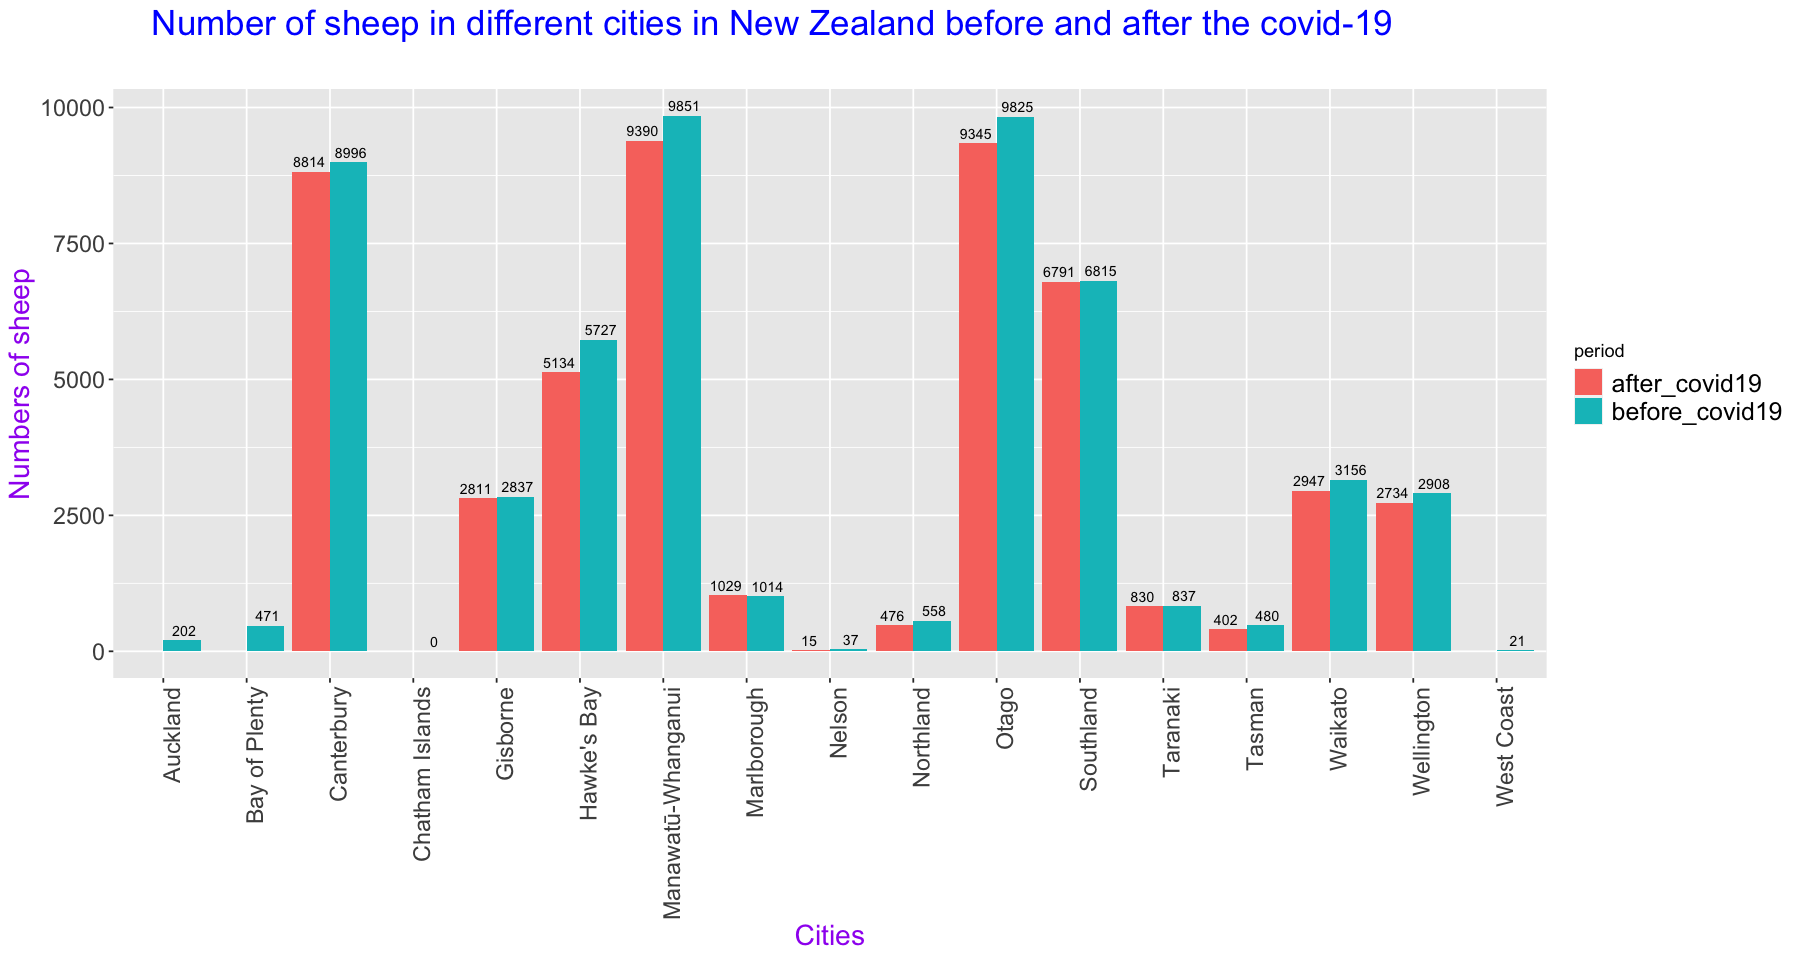

In [21]:
data_sheep_comp_graph <- ggplot(data =compare_before_after_sheep, #Use the data table called 'compare_before_after_sheep'
  mapping = aes(
    x = district, #'district' as the x-axis
    y = number,#'number' as the y-axis
    fill = period))+ #filld with 'periods'
geom_col(position = "dodge") + #position is dodge format
ggtitle("Number of sheep in different cities in New Zealand before and after the covid-19
") + # title of the plot
geom_text(aes(label = number),position=position_dodge(width = 1),size = 3,vjust = -0.5)+ #number of the vertical coordinate is displayed on each column
    theme(plot.title = element_text(size=21,hjust=0.2,color= "blue"), # set size,color  of title
        axis.title = element_text(size=17,color = "purple"), # set size,color of x-axis and y-axis title
        axis.text.x = element_text(size=14,angle = 90, # set size of x-axis variable
        hjust = 1
        ),
        axis.text.y = element_text(size=14, # set size of y-axis variable
        hjust = 1
        ),
        legend.text = element_text(size = 15, face = "plain"))+ #set size format of what shows on the top of each column
    xlab("Cities") + # set the x-axis title
    ylab("Numbers of sheep")  #set the y-axis title 
data_sheep_comp_graph
    

##### 1.4.3 Save the 'data_sheep_comp_graph' graph

In [22]:
ggsave(
  filename = "sheep.png",
  data_sheep_comp_graph,# The name of the saved file. The suffix determines what format the image is generated in
  width = 70,             # width
  height = 50,            # height
  units = "cm"           # units is cm
)

Warning message:
“Removed 4 rows containing missing values (geom_col).”
Warning message:
“Removed 4 rows containing missing values (geom_text).”


### 2.Data and graph on the number of cow_cattles before and after the outbreak


#### 2.1  New table about the number of cow_cattles in different regions of New Zealand before the outbreak

In [23]:
data_cow_before_covid <- livestock_2018_1[,c(1,4,5)] # Select the region column and the number of cow_cattles columns in table ‘livestock_2018_1’
data_cow_before_covid <- data_cow_before_covid %>% slice(-10,-19,-20) 
# Remove the total number of cow_cattles in the North Island and the total number of cow_cattles in the South Island and the total number of cow_cattles in whole New Zealand for each year
colnames(data_cow_before_covid) <- (c("district", "cow2018","cow2019")) #rename for the data table 
data_cow_before_covid

district,cow2018,cow2019
<chr>,<dbl>,<dbl>
Northland,367,335
Auckland,116,124
Waikato,1814,1823
Bay of Plenty,307,318
Gisborne,0,0
Hawke's Bay,87,78
Taranaki,548,587
Manawatū-Whanganui,486,468
Wellington,79,83


#### 2.1.1 Add new column for the period for the data (before covid-19 data), and add new column about 'number' for the total numbers of cow_cattles before outbreak(year 2018-2019) and remove the cow_cattles from the data in 2018 and 2019(Where these two columns are removed to facilitate the merging of some tables with the 'rbind' function)

In [24]:

data_cow_before_covid<-mutate(data_cow_before_covid, number =cow2018+cow2019, period = "before_covid19") %>%
    select(-cow2018,-cow2019)
  
#Use mutate to add new column called "period" and which contains "before_covid19"
#Column "number" is number of cow_cattles in 2018 + number of cow_cattles in 2019

#Use select to delete the columns which I don't use 
  
data_cow_before_covid


district,number,period
<chr>,<dbl>,<chr>
Northland,702,before_covid19
Auckland,240,before_covid19
Waikato,3637,before_covid19
Bay of Plenty,625,before_covid19
Gisborne,0,before_covid19
Hawke's Bay,165,before_covid19
Taranaki,1135,before_covid19
Manawatū-Whanganui,954,before_covid19
Wellington,162,before_covid19


#### 2.2  New table about the number of cow_cattles in different regions of New Zealand after the outbreak

In [25]:
data_cow_after_covid <- livestock_2020_1[,c(1,4,5)] #Select the columns which are about numbers of cow_cattles in data table 'livestock_2020_1'
data_cow_after_covid <- data_cow_after_covid %>% slice(-10,-19,-20) #remove the rows about southern land,northern land and whole New Zealand total number on cow_cattles
colnames(data_cow_after_covid) <- (c("district", "cow2020","cow2021")) #rename the new table with column names
data_cow_after_covid

district,cow2020,cow2021
<chr>,<dbl>,<dbl>
Northland,311,311
Auckland,123,85
Waikato,1767,1810
Bay of Plenty,295,313
Gisborne,0,10
Hawke's Bay,0,72
Taranaki,555,538
Manawatū-Whanganui,437,444
Wellington,100,93


#### 2.2.1 Add new column for the period for the data (after covid-19 data), and add new column about 'number' for the total numbers of cow_cattles after outbreak(year 2020-2021) and remove the cow_cattles from the data in 2020 and 2021(Where these two columns are removed to facilitate the merging of some tables with the 'rbind' function)

In [26]:
data_cow_after_covid<-mutate(data_cow_after_covid, number =cow2020+cow2021, period = "after_covid19") %>%
    select(-cow2020,-cow2021)
#Use mutate to add new column called "period" and which contains "after_covid19"
#Column "number" is number of cow_cattles in 2020 + number of cow_cattles in 2021
#Delete the columns which I don't use for 

data_cow_after_covid

district,number,period
<chr>,<dbl>,<chr>
Northland,622,after_covid19
Auckland,208,after_covid19
Waikato,3577,after_covid19
Bay of Plenty,608,after_covid19
Gisborne,10,after_covid19
Hawke's Bay,72,after_covid19
Taranaki,1093,after_covid19
Manawatū-Whanganui,881,after_covid19
Wellington,193,after_covid19


#### 2.3  Merge tables on cow_cattles quantities at different time periods based on rows


In [27]:
compare_before_after_cow =rbind(data_cow_after_covid,data_cow_before_covid)
#Use rbind to combine two tables about cow_cattles numbers on different time period
compare_before_after_cow

district,number,period
<chr>,<dbl>,<chr>
Northland,622,after_covid19
Auckland,208,after_covid19
Waikato,3577,after_covid19
Bay of Plenty,608,after_covid19
Gisborne,10,after_covid19
Hawke's Bay,72,after_covid19
Taranaki,1093,after_covid19
Manawatū-Whanganui,881,after_covid19
Wellington,193,after_covid19


#### 2.4  Making graph of cow_cattles numbers data compare with two different period which are after outbreak and before outbreak



##### 2.4.1 Set graph size

In [28]:
options(repr.plot.width=15, repr.plot.height=8)#graph width is size 15 and the height is size 8

##### 2.4.2 Make column graph about cow_cattles

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substitu

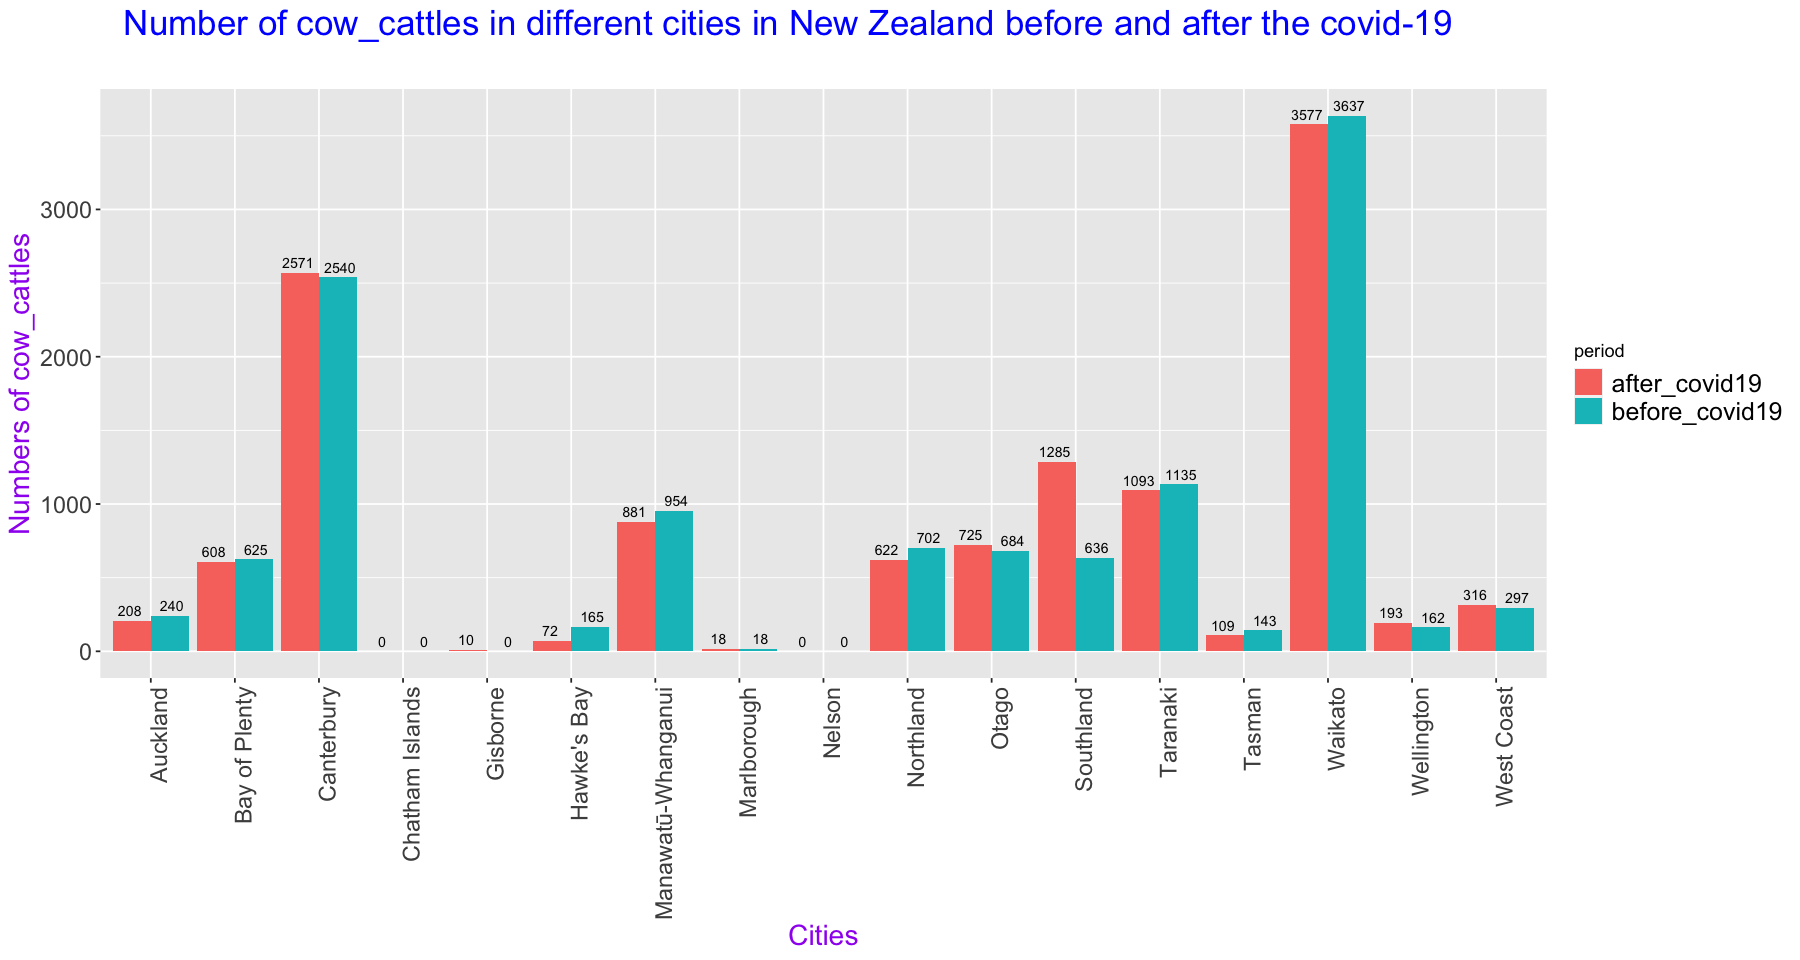

In [29]:
data_cow_comp_graph <- ggplot(data =compare_before_after_cow,#Use the data table called 'compare_before_after_cow'
  mapping = aes(
    x = district, #'district' as the x-axis
    y = number,#'number' as the y-axis
    fill = period)) + #filld with 'periods'
  geom_col(position = "dodge") + #position is dodge format
ggtitle("Number of cow_cattles in different cities in New Zealand before and after the covid-19
") + # title of the plot
geom_text(aes(label = number),position=position_dodge(width = 1),size = 3,vjust = -0.5)+ #number of the vertical coordinate is displayed on each column
    theme(plot.title = element_text(size=21,hjust=0.2,color= "blue"), # set size, color of title
        axis.title = element_text(size=17,color = "purple"), # set size,color of x-axis and y-axis title
        axis.text.x = element_text(size=14,angle = 90, # set size,angle of x-axis variable
        hjust = 1
        ),
        axis.text.y = element_text(size=14, # set size of x-axis variable
        hjust = 1
        ),
        legend.text = element_text(size = 15, face = "plain"))+ #set size format of the text that displayed on columns
    xlab("Cities") + # set the x-axis title
    ylab("Numbers of cow_cattles") # set the y-axis title
data_cow_comp_graph
    

##### 2.4.3 Save the 'data_cow_comp_graph' graph

In [30]:
ggsave(
  filename = "cow_cattles.png",
  data_cow_comp_graph,# The name of the saved file. The suffix determines what format the image is generated in
  width = 70,             # width
  height = 50,            # height
  units = "cm"           # units is cm
)

### 3.Data and graph on the number of beefs before and after the outbreak


#### 3.1  New table about the number of beefs in different regions of New Zealand before the outbreak

In [31]:
data_beef_before_covid <- livestock_2018_1[,c(1,6,7)] # Select the region column and the number of beefs columns in table ‘livestock_2018_1’
data_beef_before_covid <- data_beef_before_covid %>% slice(-10,-19,-20)
# Remove the total number of beefs in the North Island and the total number of beefs in the South Island and the total number of beefs in New Zealand each year
colnames(data_beef_before_covid) <- (c("district", "beef2018","beef2019")) #rename for the data table 
data_beef_before_covid


district,beef2018,beef2019
<chr>,<dbl>,<dbl>
Northland,400,382
Auckland,114,118
Waikato,517,547
Bay of Plenty,96,107
Gisborne,261,254
Hawke's Bay,429,449
Taranaki,116,125
Manawatū-Whanganui,554,575
Wellington,132,150


#### 3.1.1 Add new column for the period for the data (before covid-19 data), and add new column about 'number' for the total numbers of beefs before outbreak(year 2018-2019) and remove the beefs from the data in 2018 and 2019(Where these two columns are removed to facilitate the merging of some tables with the 'rbind' function)

In [32]:

data_beef_before_covid<-mutate(data_beef_before_covid, number =beef2018+beef2019, period = "before_covid19") %>%
    select(-beef2018,-beef2019)
#Use mutate to add new column called "period" and which contains "before_covid19"
#Column "number" is number of beefs in 2018 + number of beef in 2019

#Use select to delete the columns which I don't use 
  

data_beef_before_covid

district,number,period
<chr>,<dbl>,<chr>
Northland,782,before_covid19
Auckland,232,before_covid19
Waikato,1064,before_covid19
Bay of Plenty,203,before_covid19
Gisborne,515,before_covid19
Hawke's Bay,878,before_covid19
Taranaki,241,before_covid19
Manawatū-Whanganui,1129,before_covid19
Wellington,282,before_covid19


#### 3.2  New table about the number of beefs in different regions of New Zealand after the outbreak

In [33]:
data_beef_after_covid <- livestock_2020_1[,c(1,6,7)]  #Select the columns which are about numbers of beefs in data table 'livestock_2020_1'
data_beef_after_covid <- data_beef_after_covid %>% slice(-10,-19,-20)  #remove the rows about southern land,northern land and whole New Zealand total number on beefs
colnames(data_beef_after_covid) <- (c("district", "beef2020","beef2021"))  #rename the new table with column names
data_beef_after_covid

district,beef2020,beef2021
<chr>,<dbl>,<dbl>
Northland,378,361
Auckland,113,125
Waikato,540,622
Bay of Plenty,110,0
Gisborne,250,261
Hawke's Bay,400,418
Taranaki,122,129
Manawatū-Whanganui,572,595
Wellington,152,154


#### 3.2.1 Add new column for the period for the data (after covid-19 data), and add new column about 'number' for the total numbers of beefs after outbreak(year 2020-2021) and remove the beefs from the data in 2020 and 2021(Where these two columns are removed to facilitate the merging of some tables with the 'rbind' function)

In [34]:
data_beef_after_covid<-mutate(data_beef_after_covid, number =beef2020+beef2021, period = "after_covid19") %>%
    select(-beef2020,-beef2021)
#Use mutate to add new column called "period" and which contains "after_covid19"
#Column "number" is number of beefs in 2020 + number of beefs in 2021
#Delete the columns which I don't use for 
  

data_beef_after_covid

district,number,period
<chr>,<dbl>,<chr>
Northland,739,after_covid19
Auckland,238,after_covid19
Waikato,1162,after_covid19
Bay of Plenty,110,after_covid19
Gisborne,511,after_covid19
Hawke's Bay,818,after_covid19
Taranaki,251,after_covid19
Manawatū-Whanganui,1167,after_covid19
Wellington,306,after_covid19


#### 3.3  Merge tables on beefs quantities at different time periods based on rows


In [35]:
compare_before_after_beef =rbind(data_beef_after_covid,data_beef_before_covid)
#Use rbind to combine two tables about beefs number on different time period
compare_before_after_beef

district,number,period
<chr>,<dbl>,<chr>
Northland,739,after_covid19
Auckland,238,after_covid19
Waikato,1162,after_covid19
Bay of Plenty,110,after_covid19
Gisborne,511,after_covid19
Hawke's Bay,818,after_covid19
Taranaki,251,after_covid19
Manawatū-Whanganui,1167,after_covid19
Wellington,306,after_covid19


#### 3.4  Making graph of beefs
 

##### 3.4.1 Set graph size

In [36]:
options(repr.plot.width=15, repr.plot.height=8)

##### 3.4.2 Make column graph about beefs

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substitu

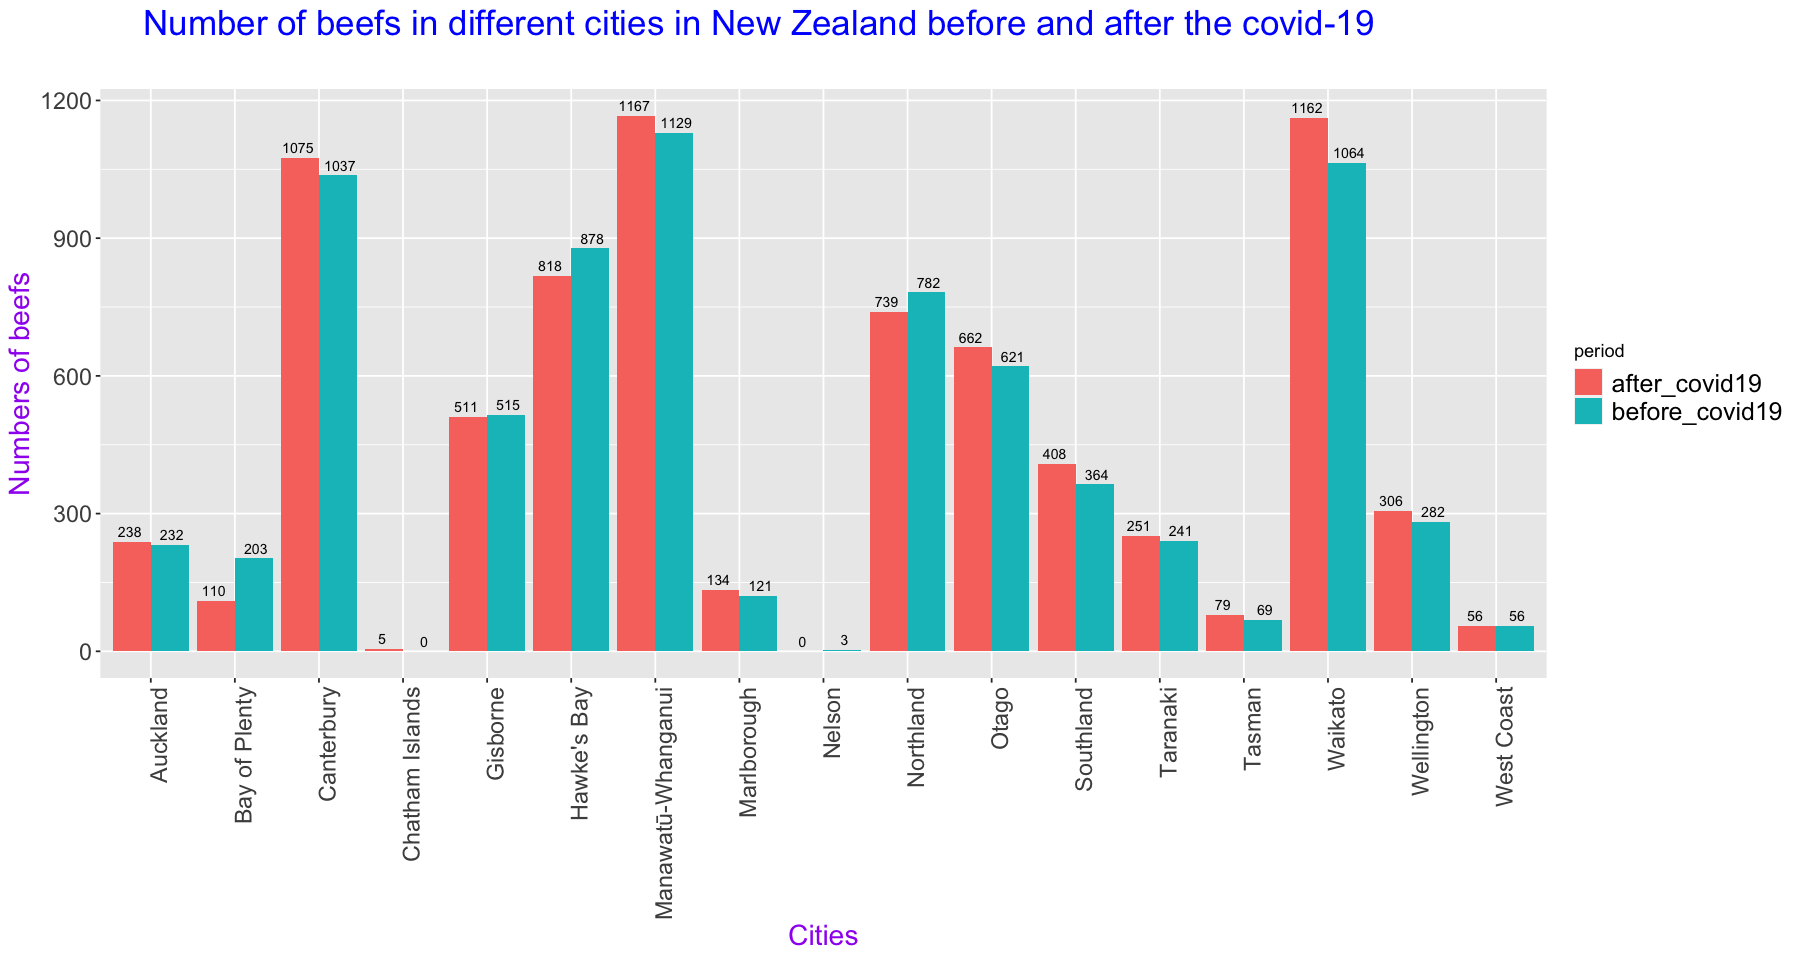

In [37]:
data_beef_comp_graph <- ggplot(data =compare_before_after_beef,#Use the data table called 'compare_before_after_beefs'
  mapping = aes(
    x = district, #'district' as the x-axis
    y = number,#'number' as the y-axis
    fill = period))+#filld with 'periods'
geom_col(position = "dodge") +  #position is dodge format
ggtitle("Number of beefs in different cities in New Zealand before and after the covid-19
") + # title of the plot
geom_text(aes(label = number),position=position_dodge(width = 1),size = 3,vjust = -0.5)+ #number of the vertical coordinate is displayed on each column
    theme(plot.title = element_text(size=21,hjust=0.2,color= "blue"), # set size, color of title
        axis.title = element_text(size=17,color = "purple"),  # set size,color of x-axis and y-axis title
        axis.text.x = element_text(size=14,angle = 90, # set size,angle of x-axis variable
        hjust = 1
        ),
        axis.text.y = element_text(size=14, # set size of x-axis variable
        hjust = 1
        ),
        legend.text = element_text(size = 15, face = "plain"))+ #set size format of the text that displayed on columns
    xlab("Cities") + # set the x-axis title
    ylab("Numbers of beefs")  # set the y-axis title
data_beef_comp_graph

##### 3.4.3 Save the 'data_beef_comp_graph' graph

In [38]:
ggsave(
  filename = "beef.png",
  data_beef_comp_graph,# The name of the saved file. The suffix determines what format the image is generated in
  width = 70,             # width
  height = 50,            # height
  units = "cm"           # units is cm
)

### 4.Data and graph on the number of deer before and after the outbreak


#### 4.1  New table about the number of deer in different regions of New Zealand before the outbreak

In [39]:
data_deer_before_covid <- livestock_2018_1[,c(1,8,9)] # Select the region column and the number of deer columns in table ‘livestock_2018_1’
data_deer_before_covid <- data_deer_before_covid %>% slice(-10,-19,-20) # Remove the total number of deer in the North Island and the total number of deer in the South Island and the total number of deer in New Zealand each year
colnames(data_deer_before_covid) <- (c("district", "deer2018","deer2019")) #rename for the data table 
data_deer_before_covid


district,deer2018,deer2019
<chr>,<dbl>,<dbl>
Northland,4,0
Auckland,11,9
Waikato,67,67
Bay of Plenty,37,0
Gisborne,0,0
Hawke's Bay,56,61
Taranaki,3,3
Manawatū-Whanganui,56,51
Wellington,0,8


#### 4.1.1 Add new column for the period for the data (before covid-19 data), and add new column about 'number' for the total numbers of deer before outbreak(year 2018-2019) and remove the deer from the data in 2018 and 2019(Where these two columns are removed to facilitate the merging of some tables with the 'rbind' function)

In [40]:
data_deer_before_covid<-mutate(data_deer_before_covid, number =deer2018+deer2019, period = "before_covid19") %>%
    select(-deer2018,-deer2019)
  
#Use mutate to add new column called "period" and which contains "before_covid19"
#Column "number" is number of deer in 2018 + number of deer in 2019

#Use select to delete the columns which I don't use 
  
data_deer_before_covid


district,number,period
<chr>,<dbl>,<chr>
Northland,4,before_covid19
Auckland,20,before_covid19
Waikato,134,before_covid19
Bay of Plenty,37,before_covid19
Gisborne,0,before_covid19
Hawke's Bay,117,before_covid19
Taranaki,6,before_covid19
Manawatū-Whanganui,107,before_covid19
Wellington,8,before_covid19


#### 4.2  New table about the number of deer in different regions of New Zealand after the outbreak

In [41]:
data_deer_after_covid <- livestock_2020_1[,c(1,8,9)]  #Select the columns which are about numbers of deer in data table 'livestock_2020_1'
data_deer_after_covid <- data_deer_after_covid %>% slice(-10,-19,-20) #remove the rows about southern land,northern land and whole New Zealand total number on deer
colnames(data_deer_after_covid) <- (c("district", "deer2020","deer2021")) #rename the new table with column names
data_deer_after_covid

district,deer2020,deer2021
<chr>,<dbl>,<dbl>
Northland,0,0
Auckland,0,6
Waikato,70,64
Bay of Plenty,37,0
Gisborne,0,0
Hawke's Bay,67,60
Taranaki,3,2
Manawatū-Whanganui,50,47
Wellington,0,0


#### 4.2.1 Add new column for the period for the data (after covid-19 data), and add new column about 'number' for the total numbers of deer after outbreak(year 2020-2021) and remove the deer from the data in 2020 and 2021(Where these two columns are removed to facilitate the merging of some tables with the 'rbind' function)

In [42]:
data_deer_after_covid<-mutate(data_deer_after_covid, number =deer2020+deer2021, period = "after_covid19") %>%
    select(-deer2020,-deer2021)
  
#Use mutate to add new column called "period" and which contains "after_covid19"
#Column "number" is number of deer in 2020 + number of deer in 2021
#Delete the columns which I don't use for 
data_deer_after_covid

district,number,period
<chr>,<dbl>,<chr>
Northland,0,after_covid19
Auckland,6,after_covid19
Waikato,134,after_covid19
Bay of Plenty,37,after_covid19
Gisborne,0,after_covid19
Hawke's Bay,127,after_covid19
Taranaki,5,after_covid19
Manawatū-Whanganui,97,after_covid19
Wellington,0,after_covid19


#### 4.3  Merge tables on deer quantities at different time periods based on rows


In [43]:
compare_before_after_deer =rbind(data_deer_after_covid,data_deer_before_covid)
#Use rbind to combine two tables about deer number on different time period
compare_before_after_deer

district,number,period
<chr>,<dbl>,<chr>
Northland,0,after_covid19
Auckland,6,after_covid19
Waikato,134,after_covid19
Bay of Plenty,37,after_covid19
Gisborne,0,after_covid19
Hawke's Bay,127,after_covid19
Taranaki,5,after_covid19
Manawatū-Whanganui,97,after_covid19
Wellington,0,after_covid19


#### 4.4  Making graph of deer numbers data compare with two different period which are after outbreak and before outbreak



##### 4.4.1 Set graph size

In [44]:
options(repr.plot.width=15, repr.plot.height=8) #graph width is size 15 and the height is size 8

##### 4.4.2 Make column graph about deer

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substitu

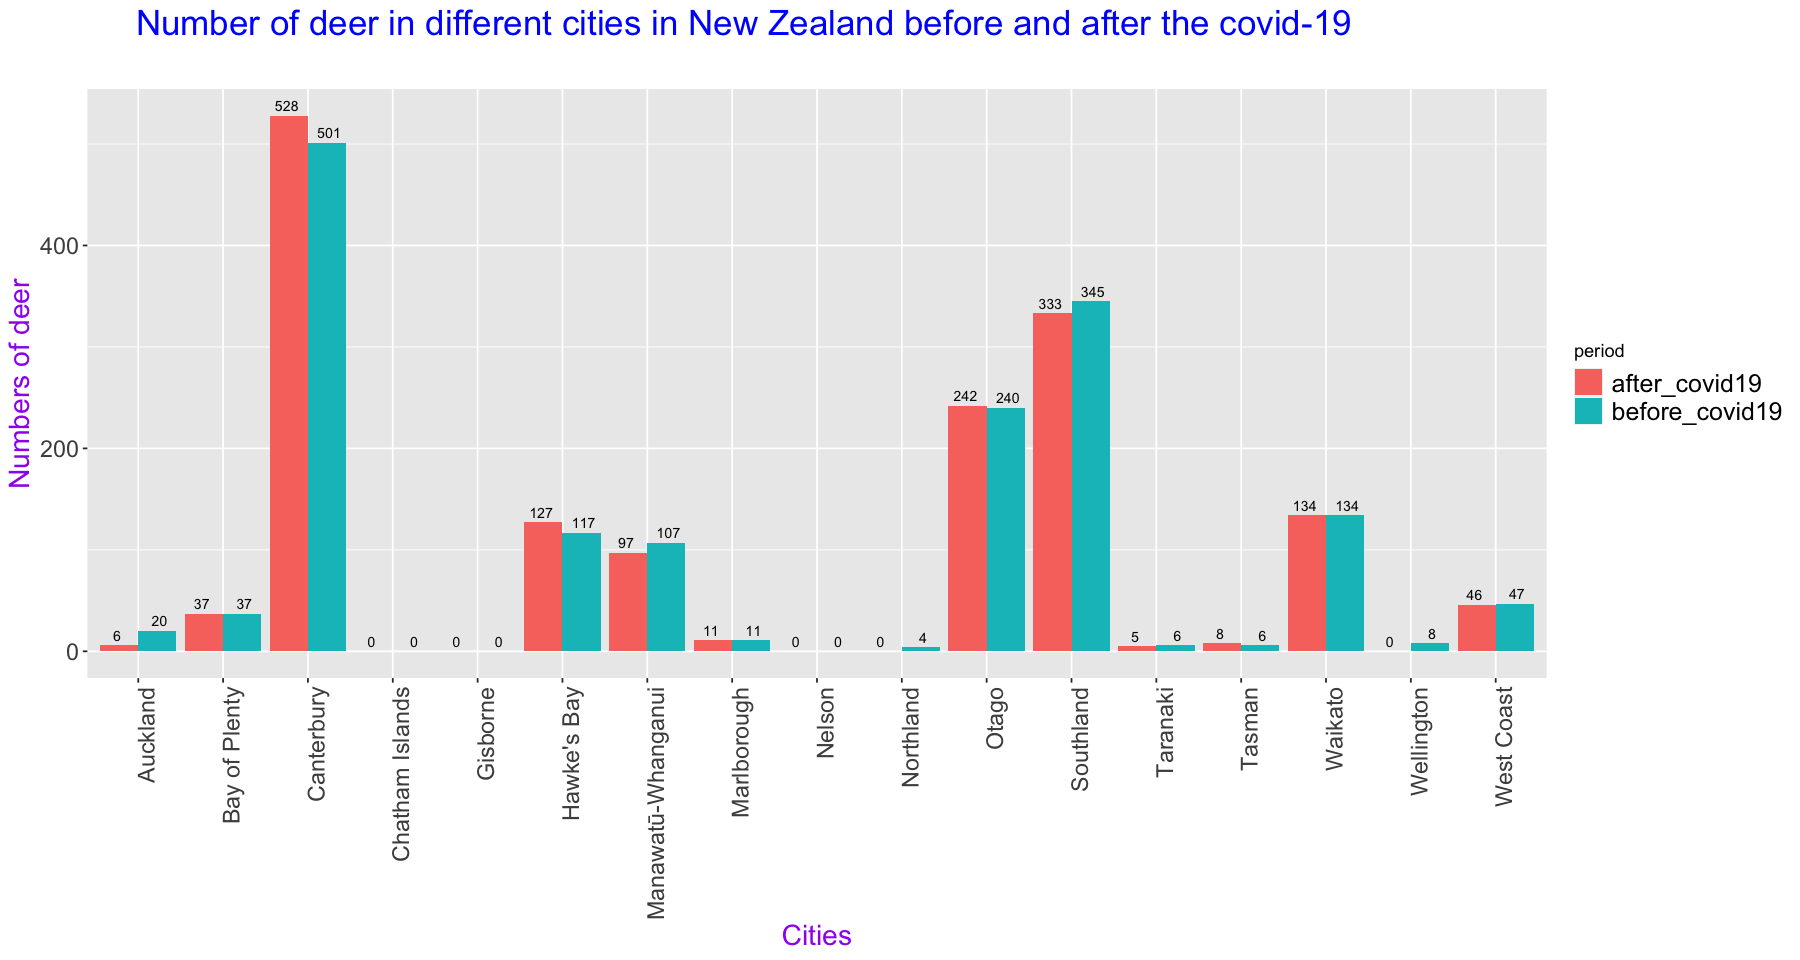

In [45]:
data_deer_comp_graph <- ggplot(data =compare_before_after_deer, #Use the data table called 'compare_before_after_deer'
  mapping = aes(
    x = district, #'district' as the x-axis
    y = number,#'number' as the y-axis
    fill = period)) + #filld with 'periods'
geom_col(position = "dodge") +  #position is dodge format
ggtitle("Number of deer in different cities in New Zealand before and after the covid-19
") + # title of the plot
geom_text(aes(label = number),position=position_dodge(width = 1),size = 3,vjust = -0.5)+ #number of the vertical coordinate is displayed on each column
    theme(plot.title = element_text(size=21,hjust=0.2,color= "blue"), # set size, color of title
        axis.title = element_text(size=17,color = "purple"),# set size,color of x-axis and y-axis title
        axis.text.x = element_text(size=14,angle = 90, # set size,angle of x-axis variable
        hjust = 1
        ),
        axis.text.y = element_text(size=14, # set size of x-axis variable
        hjust = 1
        ),
        legend.text = element_text(size = 15, face = "plain"))+ #set size format of the text that displayed on columns
    xlab("Cities") + # set the x-axis title
    ylab("Numbers of deer") # set the y-axis title
data_deer_comp_graph
    

##### 4.4.3 Save the 'data_deer_comp_graph' graph

In [46]:
ggsave(
  filename = "deer.png",
  data_deer_comp_graph,# The name of the saved file. The suffix determines what format the image is generated in
  width = 70,             # width
  height = 50,            # height
  units = "cm"           # units is cm
)

### 5 Save the four livestocks graphs into one graph

#### 5.1 Set graph size

In [47]:
options(repr.plot.width=30, repr.plot.height=15)

#### 5.1 Combine 4 compared livestocks graphs into one graph

Warning message:
“Removed 4 rows containing missing values (geom_col).”
Warning message:
“Removed 4 rows containing missing values (geom_text).”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Manawatū-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>”
Warning me

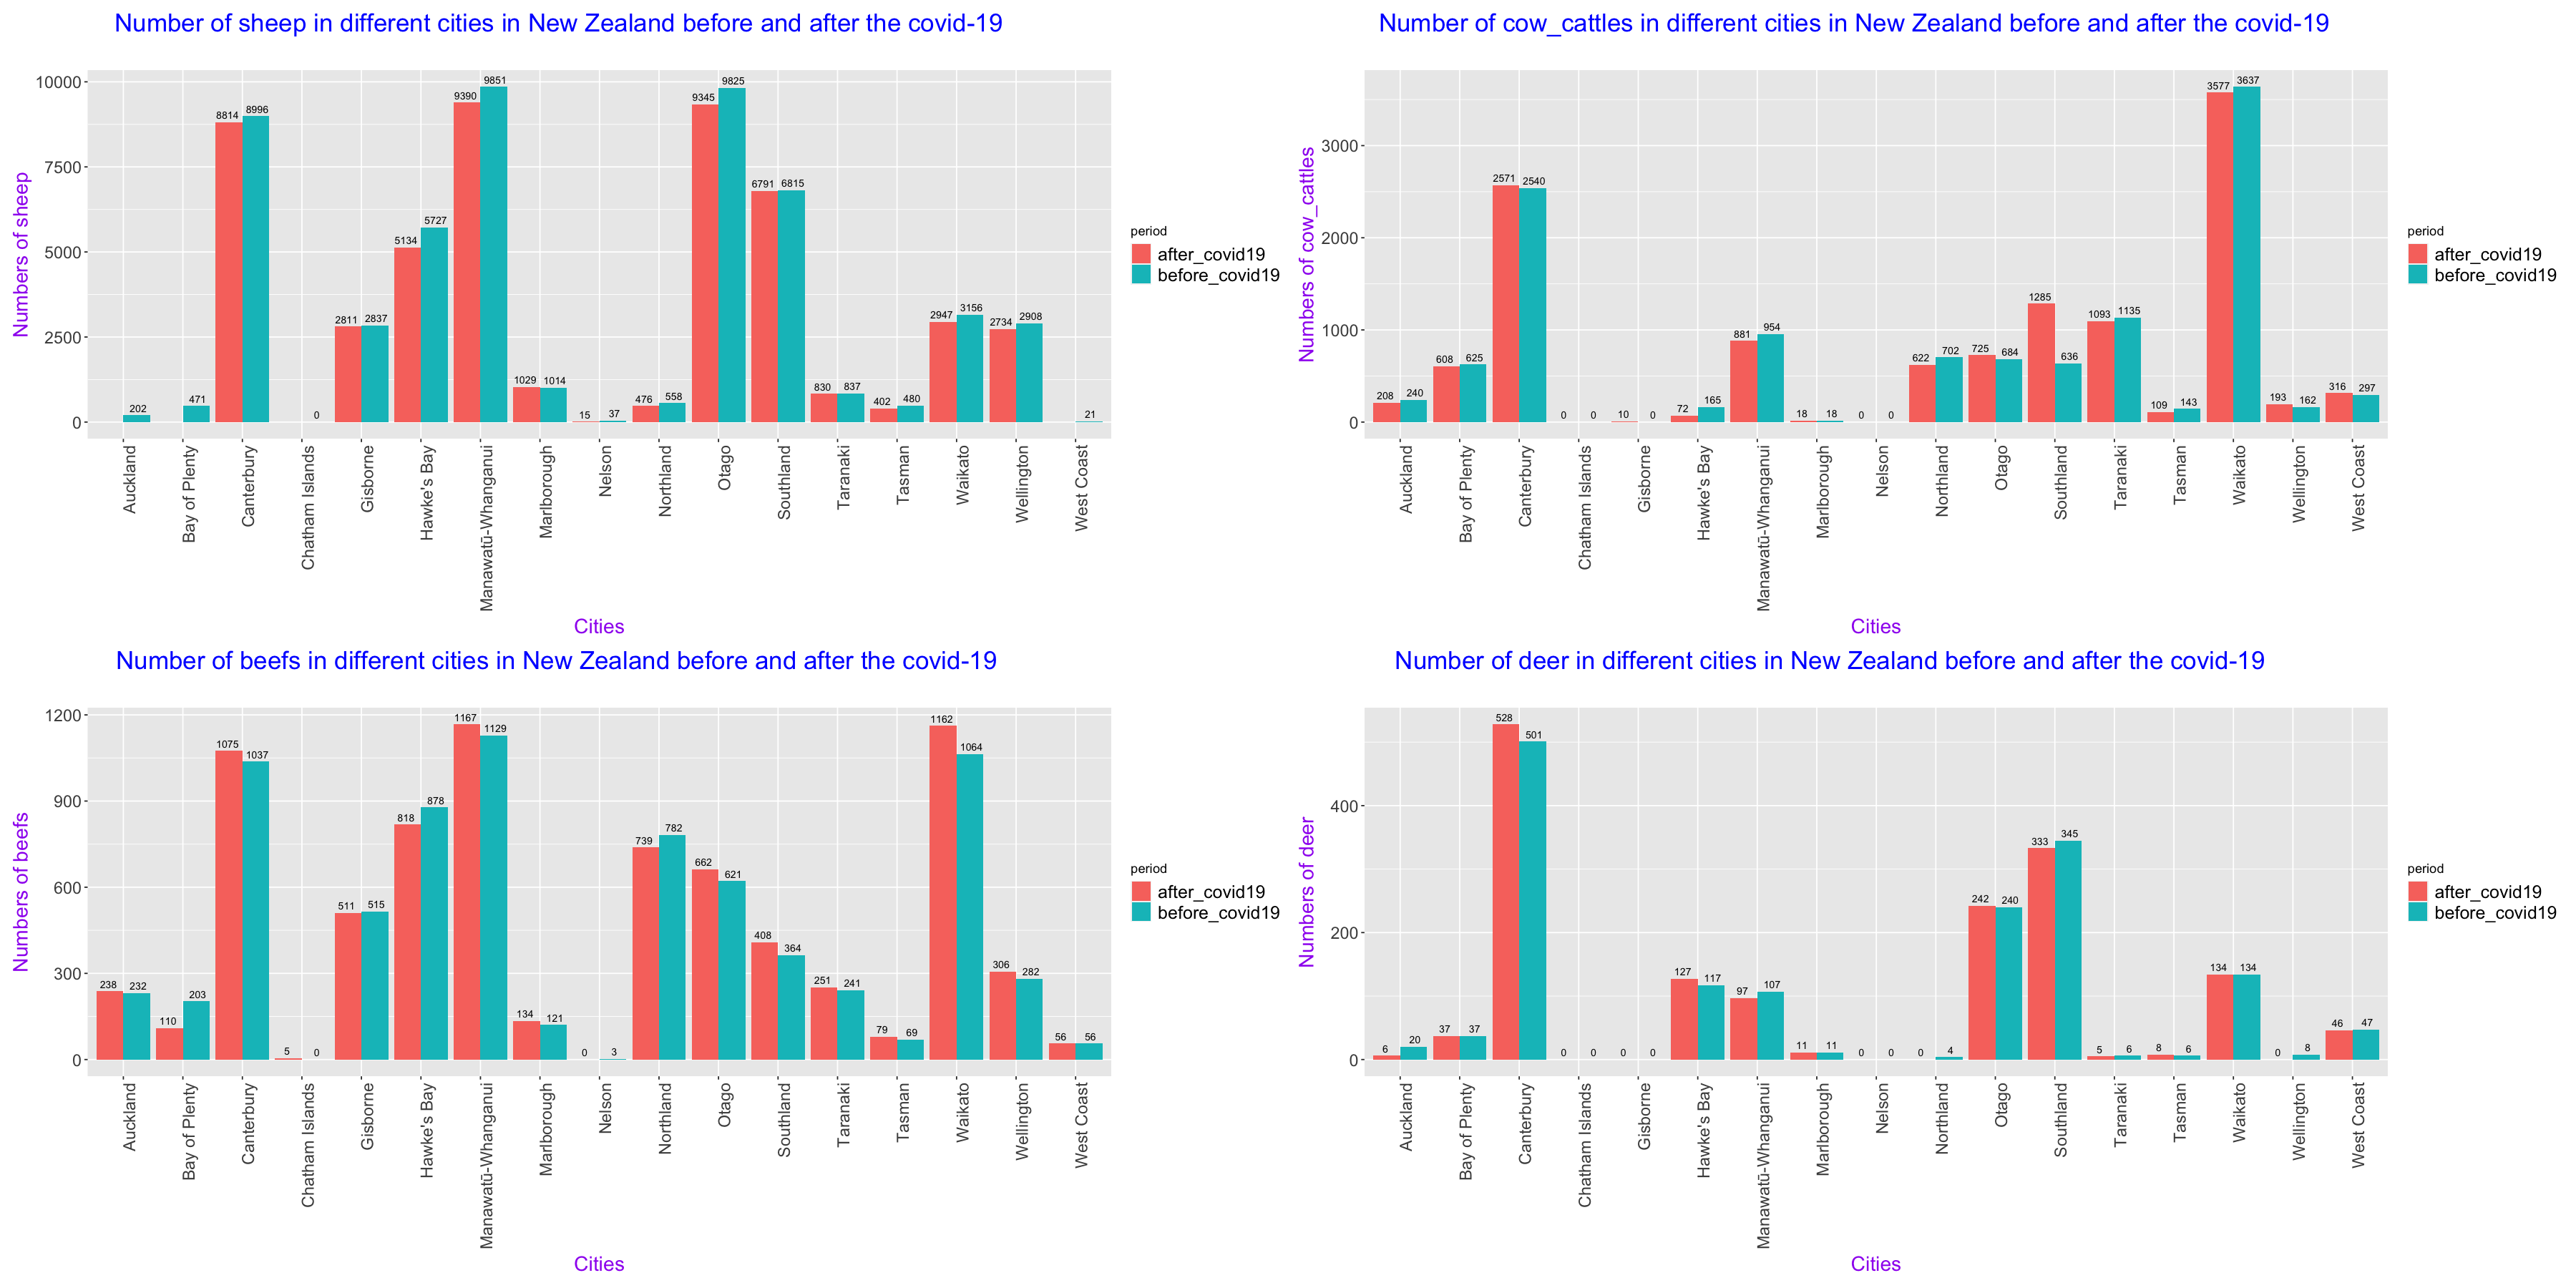

In [48]:
all_livestock_graphs<-data_sheep_comp_graph + data_cow_comp_graph + data_beef_comp_graph + data_deer_comp_graph
all_livestock_graphs

#### 5.2 Save graph

In [49]:
ggsave(
  filename = "combine_livestocks_graph.png",
  all_livestock_graphs,# The name of the saved file. The suffix determines what format the image is generated in
  width = 70,             # width
  height = 50,            # height
  units = "cm"           # units is cm
)

Warning message:
“Removed 4 rows containing missing values (geom_col).”
Warning message:
“Removed 4 rows containing missing values (geom_text).”
